# EQUAÇÕES DIFERENCIAIS

## EQUAÇÕES DIFERENCIAIS DE PRIMEIRA ORDEM

Texto

### EQUAÇÕES DIFERENCIAIS DE PRIMEIRA ORDEM SIMBÓLICAS

Texto

Exemplo: Resolver a equação diferencial $~~\displaystyle{\frac{dy}{dx} = -x}$

In [2]:
using SymPy

@syms x
@symfuns y

(,)

y


In [3]:
typeof(y) , typeof(x)

(SymFunction, Sym)

In [4]:
edo1 = y'(x) + x 

    d       
x + ──(y(x))
    dx      

In [5]:
dsolve(edo1)

             2
            x 
y(x) = C₁ - ──
            2 

** Método específico:**

É possível resolver uma equação diferencial utilizando um método específico. São eles: variáveis separadas, bernoulli e outros.

In [7]:
dsolve(edo1, hint = "separable")

             2
            x 
y(x) = C₁ - ──
            2 

In [8]:
# usando todos os métodos possíveis
sol_met = dsolve(edo1, hint = "all")

Dict{Any,Any} with 17 entries:
  "separable"               => Eq(y(x), C1 - x^2/2)
  "lie_group"               => Eq(y(x), C1 - x^2/2)
  "1st_exact_Integral"      => Eq(Subs(Integral(1, _y) + Integral(x, x), (_y,),…
  "Bernoulli"               => Eq(y(x), C1 - x^2/2)
  "nth_linear_constant_coe… => Eq(y(x), C1 - Integral(x, x))
  "nth_linear_constant_coe… => Eq(y(x), C1 - x^2/2)
  "separable_Integral"      => Eq(Integral(1, (_y, y(x))), C1 + Integral(-x, x))
  "1st_linear_Integral"     => Eq(y(x), C1 + Integral(-x, x))
  "best"                    => Eq(y(x), C1 - x^2/2)
  "1st_linear"              => Eq(y(x), C1 - x^2/2)
  "nth_linear_constant_coe… => Eq(y(x), C1 - x^2/2)
  "default"                 => "separable"
  "best_hint"               => "separable"
  "1st_exact"               => Eq(y(x), C1 - x^2/2)
  "1st_power_series"        => Eq(y(x), -x^2/2 + C1 + O(x^6))
  "order"                   => 1
  "Bernoulli_Integral"      => Eq(y(x), C1 - Integral(x, x))

In [9]:
typeof(sol_met)

Dict{Any,Any}

O resultado do cálculo da equação diferencial em todos os métodos é um dicionário. Para obter a solução de um métido específico use:
```julia
sol_met["nome_método"]
```

In [10]:
sol_met["1st_power_series"]

          2             
         x          ⎛ 6⎞
y(x) = - ── + C₁ + O⎝x ⎠
         2              

In [11]:
sol_met["Bernoulli_Integral"]

            ⌠     
y(x) = C₁ - ⎮ x dx
            ⌡     

#### EQUAÇÃO DIFERENCIAL  DE PRIMEIRA ORDEM COM VALORES INICIAIS 

Exemplo: Resolver a equação diferencial $~~\displaystyle{\frac{dy}{dx} = -x}~~$ , $~~y(0) = 1$

In [12]:
using SymPy

@syms x
@symfuns y

(,)

y


In [13]:
edo1 = y'(x) + x

    d       
x + ──(y(x))
    dx      

In [14]:
sol_simb =  dsolve(edo1, x, (y, 0, 1))

          2    
         x     
y(x) = - ── + 1
         2     

In [15]:
# Manipulando valores da solução
sol_simb(1)

y(1) = 1/2

In [16]:
# ou somente a função "y"
Y = rhs(sol_simb)

Y(1)

1/2

Exemplo: Calcular a equação diferencial $\displaystyle{ \frac{dy}{dx} = - xy ~~}$, $~~y(0) = 1$

In [17]:
using SymPy

@syms x
@symfuns y

(,)

y


In [18]:
sol_simb2 =  dsolve( y'(x) + x*y(x)  , x , (y,0,1))

          2 
        -x  
        ────
         2  
y(x) = ℯ    

In [20]:
# Manipulando valores da solução
sol_simb2(1)

        -1/2
y(1) = ℯ    

In [27]:
# ou somente a função "y"
Ys = rhs(sol_simb2) 

Ys(1) 

 -1/2
ℯ    

In [35]:
# ou ainda 
rhs(sol_simb2)(1)

 -1/2
e    

#### GRÁFICO DA SOLUÇÃO DA EQUAÇÃO DIFERENCIAL DE PRIMEIRA ORDEM 

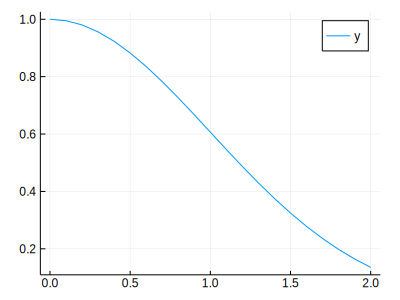

In [32]:
using Plots
gr()

plot((Ys), 0:0.1:2, size = (400, 300), label = "y")

#### CAMPO DE DIREÇÕES DE UMA EQUAÇÃO DIFERENCIAL DE PRIMEIRA ORDEM

### EQUAÇÃO DIFERENCIAL DE PRIMEIRA ORDEM NUMÉRICA 

#### Pacote ODE

Atualmente, ODE exporta os seguintes métodos de solução:

- ode23: `Solver` de 2ª ordem com controle de erro 3ª ordem, com base nos coeficientes de Bogacki-Shampine;


- ode45: `Solver` de 4ª ordem com controle de erro 5º ordem, usando os coeficientes de Dormand. Coeficientes de Fehlberg e Cash-Karp também estão disponíveis;


- ode78: `Solver` de 7ª ordem com controle de erro 8ª ordem, usando os coeficientes de Fehlberg;


- ode23s: `Solver` de 2ª/3ª ordem para problemas rígidos, utilizando uma modificação de Rosenbrock.

$\displaystyle{\frac{dy}{dx}=(-5x - \frac{y}{5})^3 + 10}$

In [34]:
using ODE

┌ Info: Precompiling ODE [c030b06c-0b6d-57c2-b091-7029874bd033]
└ @ Base loading.jl:1189


In [41]:
function Rk_JL()
    
  f(x, y) = (-5.0*x - y/5.0)^3 + 10.0
  tspan  = 0.:0.1:1.0
  y0     = [0.0, 1.0]
    
  return ode45(f, y0,tspan)
end

Rk_JL (generic function with 1 method)

In [42]:
x , y = Rk_JL()
y

MethodError: MethodError: no method matching -(::Float64, ::Array{Float64,1})
Closest candidates are:
  -(::Float64, !Matched::Float64) at float.jl:397
  -(::Float64) at float.jl:387
  -(!Matched::PyCall.PyObject, ::Any) at /home/jmarcellopereira/.julia/packages/PyCall/rUul9/src/pyoperators.jl:14
  ...

## EQUAÇÕES DIFERENCIAIS DE SEGUNDA ORDEM

$\displaystyle{ y'' - 4y - x = 0}$ 

Exemplo: Resolva a equação diferencial $\displaystyle{ \frac{d^2y}{d^2x} = x + 4y}$

In [43]:
using SymPy

@syms x
@symfuns y

(,)

y


In [21]:
edo2 = y''(x) - 4*y(x) - x

                2      
               d       
-x - 4⋅y(x) + ───(y(x))
                2      
              dx       

In [22]:
dsolve(edo2)

           -2⋅x       2⋅x   x
y(x) = C₁⋅ℯ     + C₂⋅ℯ    - ─
                            4

#### EQUAÇÃO DIFERENCIAL DE SEGUNDA ORDEM COM VALORES INICIAIS 

Exemplo: Resolva o problema de valor inicial  $~~\displaystyle{ \frac{d^2y}{d^2x} = x + 4y}~~$, $~~y(0)=1~~$ , $~~y'(0) = 0$

In [23]:
using SymPy

@syms x
@symfuns y

(,)

y


In [26]:
edo2 = y''(x) - 4*y(x) - x

                2      
               d       
-x - 4⋅y(x) + ───(y(x))
                2      
              dx       

In [27]:
sol_simb_ord2 = dsolve(edo2, x, (y, 0, 1), (y', 0, 0))

                2⋅x      -2⋅x
         x   9⋅ℯ      7⋅ℯ    
y(x) = - ─ + ────── + ───────
         4     16        16  

In [28]:
# manipulando ao solução geral 
sol_simb_ord2(1)

                -2      2
         1   7⋅ℯ     9⋅ℯ 
y(1) = - ─ + ───── + ────
         4     16     16 

In [29]:
# Manipulando a solução "y"
# ou somente a função "y"
Y2ord = rhs(sol_simb_ord2) 

Y2ord(1) 

         -2      2
  1   7⋅ℯ     9⋅ℯ 
- ─ + ───── + ────
  4     16     16 

In [30]:
# ou ainda
rhs(sol_simb_ord2)(1)

         -2      2
  1   7⋅ℯ     9⋅ℯ 
- ─ + ───── + ────
  4     16     16 

#### GRÁFICO DA SOLUÇÃO DA EQUAÇÃO DIFERENCIAL DE SEGUNDA ORDEM 

In [31]:
# função solução S
Y2ord

         2⋅x      -2⋅x
  x   9⋅ℯ      7⋅ℯ    
- ─ + ────── + ───────
  4     16        16  

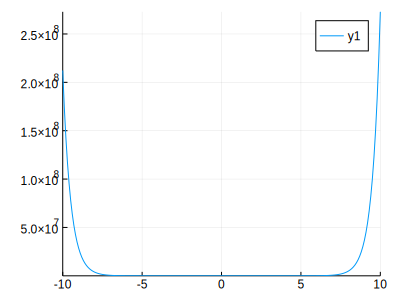

In [33]:
using Plots
gr()

plot(Y2ord, -10:0.1:10, size = (400,300))

#### CAMPO DE DIREÇÕES 

### EQUAÇÃO DE SEGUNDA ORDEM NUMÉRICA 

%%% Fim Equações Diferenciais %%%